### Twitch Subs Analytics
#### Introduction
- subscriber-list.csv is generated on Twitch > Analytics > Earnings > Subscribers frame "View details" > "Download my subscriber list"
<br> https://dashboard.twitch.tv/u/YOUR_TWITCH_USERNAME/analytics/revenue-earnings/subscriptions
- colors for matplotlib charts
<Br> https://matplotlib.org/stable/gallery/color/named_colors.html

**4/17**
- replaced line chart for subscriber tenure with scatter plot
- displaying key insights in a new df instead of a series of printed fstrings
- cleaned up charts, titles and labels

Load the Data

In [ ]:
# import library and load the file with data
import pandas as pd
data = pd.read_csv('randomized_subscriber-list.csv')
# data = pd.read_csv('subscriber-list.csv') # this is my list

# check what we're working with!
data.head()

,Username,Subscribe Date,Current Tier,Tenure,Streak,Sub Type,Founder
0,user 1,2020-07-11T12:48:30Z,Tier 1,63,13,prime,False
1,user 2,2021-01-08T02:33:57Z,Tier 3,18,18,recurring,False
2,user 3,2019-08-05T22:51:37Z,Tier 1,60,36,prime,True
3,user 4,2021-02-20T07:38:28Z,Tier 1,44,44,gift,False
4,user 5,2023-10-26T03:49:12Z,Tier 1,15,5,gift,False


Clean the Data

In [156]:
# dropping an unnecessary column (for me personally)
data = data.drop(columns='Founder')

# convert column Subscribe Date to datetime
data['Subscribe Date'] = pd.to_datetime(data['Subscribe Date']) 

# convert column to date only, dropping the time part
data['Subscribe Date'] = data['Subscribe Date'].dt.date

# sort the data by Subscribe Date + reset index
data = data.sort_values(by='Subscribe Date').reset_index(drop=True)

# OPTIONAL: drop certain users from the list, such as yourself (my username is "odetted") and bots + reset index
data = data[~data['Username'].isin(['odetted', 'nightbot'])].reset_index(drop=True) 

# OPTIONAL: if there would be a large number of users or bots you'd want dropped, we can save the list of them under a variable
# blocked_users = ['odetted', 'nightbot']
# data = data[~data['Username'].isin(blocked_users)].reset_index(drop=True)

# OPTIONAL: if you like, you can anonymize the subs and also change "Username X" to whatever else
# I go with pandas which is what I call my subs :)
data['Username'] =  'Panda ' + (data.groupby('Username').ngroup() + 1).astype(str) # +1 means we start from 'Username 1' and not 'Username 0'

# OPTIONAL: you can download the cleaned csv
# data.to_csv('cleaned_subs.csv', index=False)

# DISPLAY THE FINAL DATAFRAME 
data.head()

,Username,Subscribe Date,Current Tier,Tenure,Streak,Sub Type
0,Panda 50,2019-04-25,Tier 2,95,95,recurring
1,Panda 5,2019-05-17,Tier 1,78,78,prime
2,Panda 30,2019-06-01,Tier 1,75,30,recurring
3,Panda 23,2019-08-05,Tier 1,60,36,prime
4,Panda 40,2020-01-15,Tier 2,41,11,recurring


#### Insights

In [157]:
# import matplotlib to produce visualizations
import matplotlib.pyplot as plt

Subscriber tenure

,Metric,Value
0,Average Tenure,47.16 months
1,Longest Tenure,95 months
2,Average Streak,33.20 months
3,Longest Streak,95 months


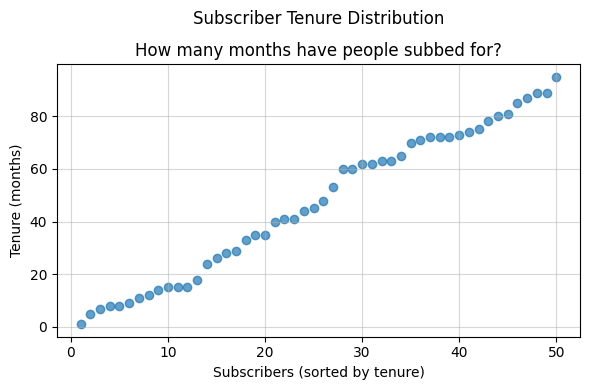

In [ ]:
mean_t = data['Tenure'].mean()
longest_t = data['Tenure'].max()
mean_s = data['Streak'].mean()
longest_s = data['Streak'].max()
# print(f'Average tenure of current subscribers is {mean_t:.2f} months')
# print(f'The longest tenure is: {longest_t} months')
# print(f'Average streak of current subscribers is {mean_s:.2f} months')
# print(f'The longest streak is: {longest_s} months')
metrics = pd.DataFrame({
    'Metric': ['Average Tenure', 'Longest Tenure', 'Average Streak', 'Longest Streak'],
    'Value': [f"{mean_t:.2f} months", f"{longest_t} months", f"{mean_s:.2f} months", f"{longest_s} months"]
})
display(metrics)

# Sort the data by 'Tenure' column and extract only the 'Tenure' values
ypoints = data.sort_values('Tenure')['Tenure']
plt.figure(figsize=(6,4))
# Generate x-axis values from 1 to the number of subscribers (inclusive), 
# representing subscriber positions in the sorted tenure list
plt.scatter(range(1, len(ypoints) + 1), ypoints.values, alpha=0.7)

plt.xlabel('Subscribers (sorted by tenure)')
plt.ylabel('Tenure (months)')
plt.title('Subscriber Tenure Distribution\nHow many months have people subbed for?', linespacing=2.0)
plt.grid(True, linestyle='-', alpha=0.5)

plt.tight_layout()
plt.savefig('tenure.png')
plt.show()

#### Visualizations

#### Subscriber Overview by Type: Bar Chart

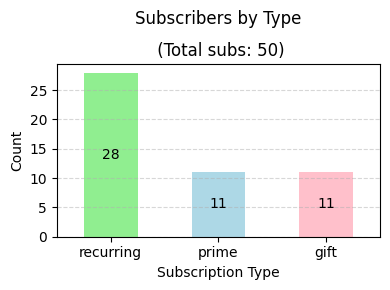

In [159]:
# obtain counts of subs per sub type
subtypes = data['Sub Type'].value_counts()
# subs

# get the total count of subs to include it in the chart title
subcount = data['Username'].count()
# subcount

# create the bar chart

# match the color with the x thingies
plt.figure(figsize=(4,3))
ax = subtypes.plot(kind='bar', color=['lightgreen', 'lightblue', 'pink'])
ax.bar_label(ax.containers[0], fontsize=10, color='black', label_type='center')

# adjust
plt.title(f'Subscribers by Type\n (Total subs: {subcount})', linespacing=2.0)
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('subs_by_type_bar.png')
plt.show()


#### Subscriber Overview by Type: Pie Chart

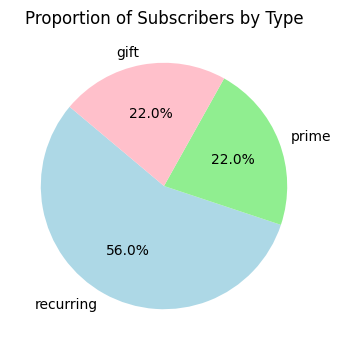

In [160]:
plt.figure(figsize=(4, 4))
plt.pie(subtypes.values, labels=subtypes.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'pink'])
plt.title('Proportion of Subscribers by Type')
plt.show()

#### Subscriber Overview by Tiers: Bar Chart

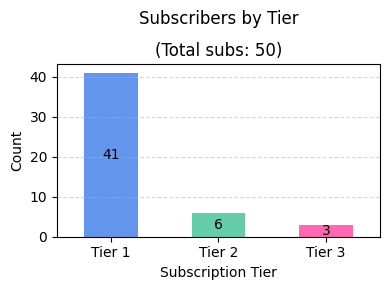

In [161]:
tiers = data['Current Tier'].value_counts()
tiers

plt.figure(figsize=(4,3))
ax = tiers.plot(kind='bar', color=['cornflowerblue', 'mediumaquamarine', 'hotpink'])
ax.bar_label(ax.containers[0], fontsize=10, color='black', label_type='center')
plt.title(f'Subscribers by Tier\n(Total subs: {subcount})', linespacing=2.0)
plt.xlabel('Subscription Tier')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('subscription_tiers_bar.png')
plt.show()

#### Subscriber Overview by Tiers: Pie Chart

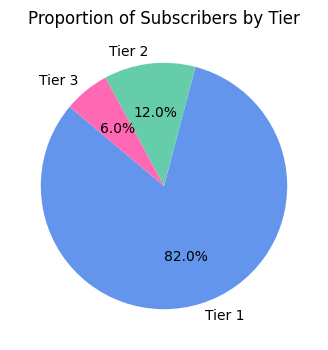

In [162]:
plt.figure(figsize=(4, 4))
plt.pie(tiers.values, labels=tiers.index, autopct='%1.1f%%', startangle=140, colors=['cornflowerblue', 'mediumaquamarine', 'hotpink'])
plt.title('Proportion of Subscribers by Tier')

plt.show()

#### DataFrames by sub type if we want to analyze them further in the future

In [163]:
recurring = data[data['Sub Type'] == 'recurring'].reset_index(drop=True) 
recurring.head()

,Username,Subscribe Date,Current Tier,Tenure,Streak,Sub Type
0,Panda 50,2019-04-25,Tier 2,95,95,recurring
1,Panda 30,2019-06-01,Tier 1,75,30,recurring
2,Panda 40,2020-01-15,Tier 2,41,11,recurring
3,Panda 11,2020-02-27,Tier 2,72,22,recurring
4,Panda 9,2020-03-28,Tier 1,85,78,recurring


In [164]:
prime = data[data['Sub Type'] == 'prime'].reset_index(drop=True) 
prime.head()

,Username,Subscribe Date,Current Tier,Tenure,Streak,Sub Type
0,Panda 5,2019-05-17,Tier 1,78,78,prime
1,Panda 23,2019-08-05,Tier 1,60,36,prime
2,Panda 38,2020-04-21,Tier 1,33,13,prime
3,Panda 43,2020-06-13,Tier 1,73,64,prime
4,Panda 1,2020-07-11,Tier 1,63,13,prime


In [165]:
gifts = data[data['Sub Type'] == 'gift'].reset_index(drop=True) 
gifts.head()

,Username,Subscribe Date,Current Tier,Tenure,Streak,Sub Type
0,Panda 16,2020-03-05,Tier 1,89,21,gift
1,Panda 31,2020-05-29,Tier 1,63,5,gift
2,Panda 34,2021-02-20,Tier 1,44,44,gift
3,Panda 36,2022-01-20,Tier 1,35,9,gift
4,Panda 28,2022-08-15,Tier 1,1,1,gift


In [166]:
data['Tenure'] > 30 # returns a series of bool T/F
data[data['Tenure'] > 40].head() # returns the df

,Username,Subscribe Date,Current Tier,Tenure,Streak,Sub Type
0,Panda 50,2019-04-25,Tier 2,95,95,recurring
1,Panda 5,2019-05-17,Tier 1,78,78,prime
2,Panda 30,2019-06-01,Tier 1,75,30,recurring
3,Panda 23,2019-08-05,Tier 1,60,36,prime
4,Panda 40,2020-01-15,Tier 2,41,11,recurring


In [167]:
data.loc[data['Tenure'] > 40].head()

,Username,Subscribe Date,Current Tier,Tenure,Streak,Sub Type
0,Panda 50,2019-04-25,Tier 2,95,95,recurring
1,Panda 5,2019-05-17,Tier 1,78,78,prime
2,Panda 30,2019-06-01,Tier 1,75,30,recurring
3,Panda 23,2019-08-05,Tier 1,60,36,prime
4,Panda 40,2020-01-15,Tier 2,41,11,recurring
